# DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ist ein Clustering-Algorithmus, der Daten basierend auf der Dichte gruppiert. Er identifiziert Cluster von beliebiger Form und markiert Punkte, die nicht genügend Nachbarn haben, als Ausreißer (Rauschen).

In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [6]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features vor dem One-Hot-Encoding:")
display(df.head())  

# Kategorische Features für das One-Hot-Encoding
categorical_features = ['cut', 'color', 'clarity']

# One-Hot-Encoding anwenden
# Beispiel
#Fair →         [1, 0, 0, 0, 0]
#Good →         [0, 1, 0, 0, 0]
#Very Good →    [0, 0, 1, 0, 0]
#Premium →      [0, 0, 0, 1, 0]
#Ideal →        [0, 0, 0, 0, 1]

encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_cats = encoder.fit_transform(df[categorical_features])

# Umwandeln der kodierten Daten in einen DataFrame
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))
# Kombinieren des ursprünglichen DataFrames mit den kodierten Werten
df_encoded = pd.concat([df, encoded_df], axis=1)

# Entfernen der ursprünglichen kategorischen Spalten
df_encoded.drop(columns=categorical_features, inplace=True)

# Wichtige numerische Features für das Clustering

#Wenn man nur bestimmte Features für das Clustering verwenden möchte
#features = ['carat', 'price', 'x', 'y', 'z', 'depth']  
#df_cluster = df_encoded[features]

print("Für das Clustering werden alle numerischen Features verwendet")
df_cluster = df_encoded.copy()

# Features für das Clustering
display(df_cluster.head())


Features vor dem One-Hot-Encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# DBSCAN-Clustering-Algorithmus 
# Skalierung der Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster) # Features skalieren, d.h. torz unterschiedlicher einheiten und skalen werden die daten auf eine einheitliche skala gebracht

# DBSCAN anwenden (Parameter kannst du anpassen)
dbscan = DBSCAN(eps=0.5, min_samples=10)  # eps bestimmt die Clustergröße, min_samples die Mindestanzahl an Punkten in einem Cluster

df_cluster['Cluster'] = dbscan.fit_predict(X_scaled) # Cluster zu den Daten hinzufügen

Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert


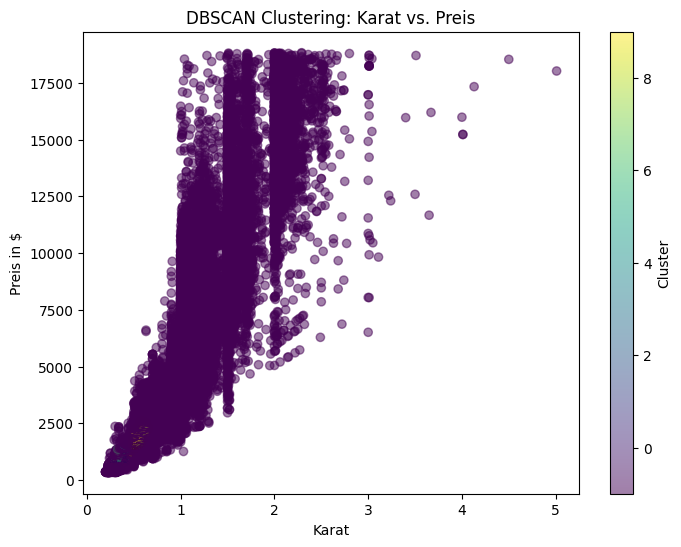

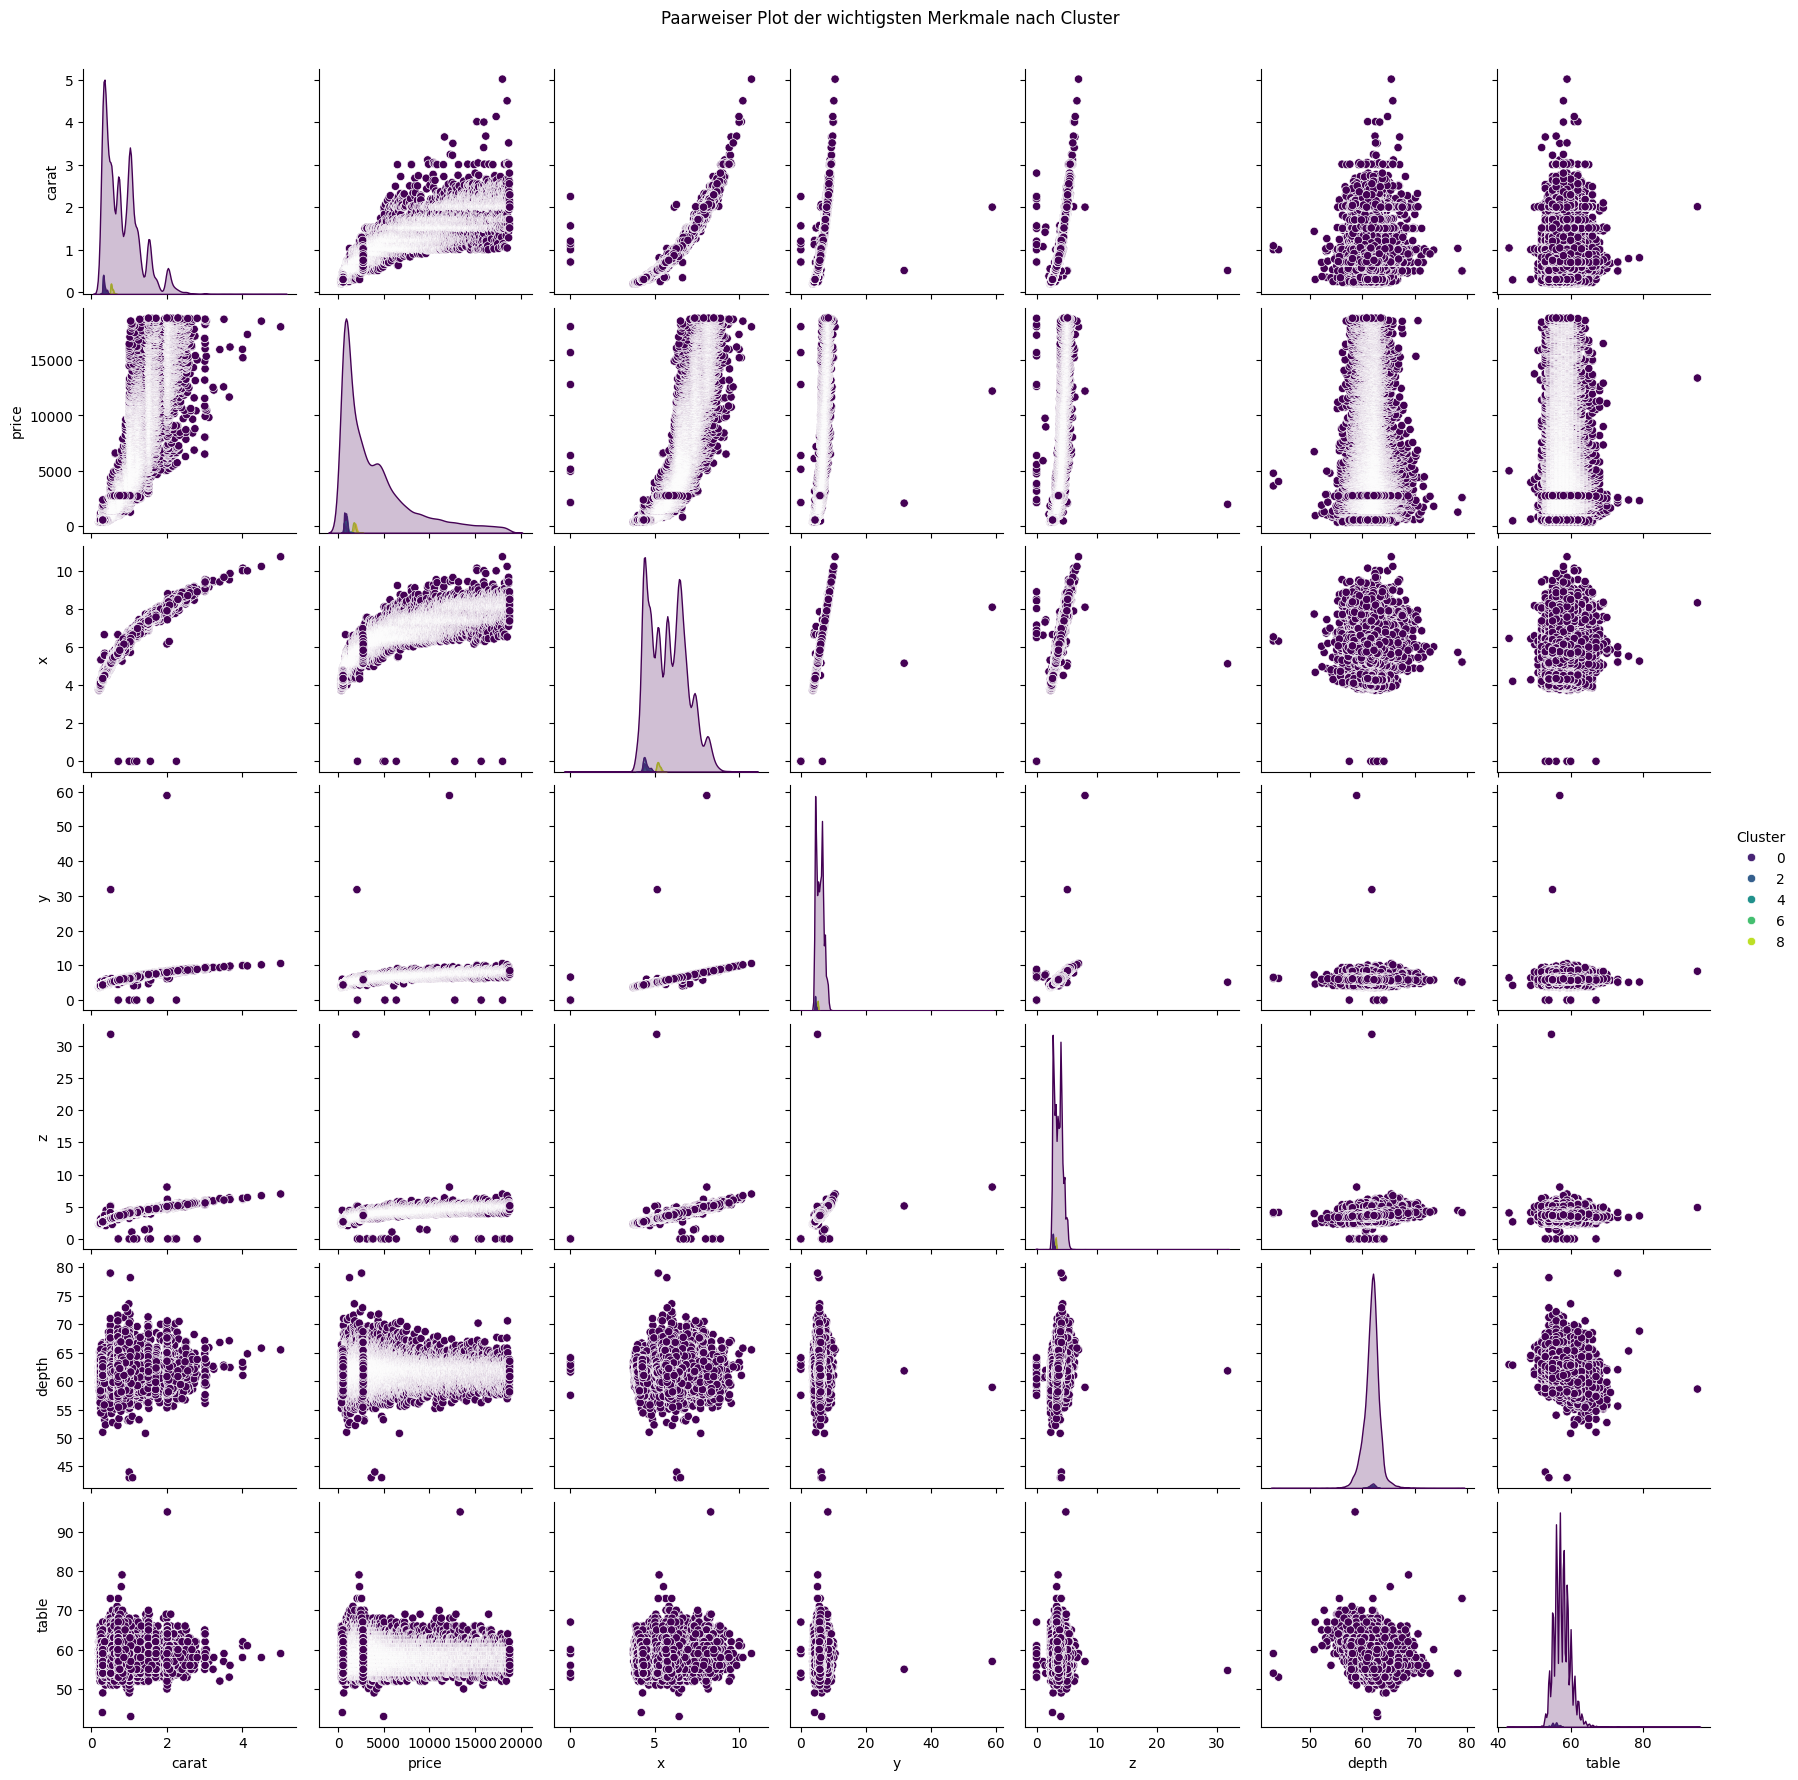

In [8]:
# Visualisierung der Cluster

# Scatterplot der Cluster (nur Carat und Preis als Beispiel)

print("Diamanten basierend auf ihren Karat- und Preis-Werten gruppiert")
plt.figure(figsize=(8,6))
plt.scatter(df_cluster['carat'], df_cluster['price'], c=df_cluster['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Karat")
plt.ylabel("Preis in $")
plt.title("DBSCAN Clustering: Karat vs. Preis")
plt.colorbar(label="Cluster")
plt.show()

# Boxplot für die Verteilung von 'carat' nach Cluster
#plt.figure(figsize=(8,6))
#sns.boxplot(x=df_cluster['Cluster'], y=df_cluster['carat'])
#plt.xlabel("Cluster")
#plt.ylabel("Karat")
#plt.title("Verteilung des Karats nach Cluster")
#plt.show()

# Paarweise Plot (Pairplot) für eine bessere Übersicht der Cluster mit mehreren Variablen
sns.pairplot(df_cluster[['carat', 'price', 'x', 'y', 'z', 'depth', 'table', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle("Paarweiser Plot der wichtigsten Merkmale nach Cluster", y=1.02)
plt.show()

# Violinplot für die Verteilung der Diamantenmerkmale innerhalb der Cluster
#plt.figure(figsize=(8,6))
#sns.violinplot(x=df_cluster['Cluster'], y=df_cluster['carat'])
#plt.xlabel("Cluster")
#plt.ylabel("Karat")
#plt.title("Violinplot der Karat-Verteilung nach Cluster")
#plt.show()

#plt.figure(figsize=(8,6))
#sns.violinplot(x=df['Cluster'], y=df['price'])
#plt.xlabel("Cluster")
#plt.ylabel("Preis in $")
#plt.title("Violinplot der Preis-Verteilung nach Cluster")
#plt.show()